In [9]:
from mesh import Mesh
from dt_mesh_deformation import DT_Mesh_Deform
from dtrbf_mesh_deformation import DTRBF1_Mesh_Deform
import numpy as np

In [10]:
v = []
for i in range(0,11):
  for j in range(0,11):
    if not (i >= 4 and i <= 6 and j == 5):
      v.append([i,j])

f = []
for i in range(0,10):
  for j in range(0,10):
    if not (i >= 3 and i <= 6 and j >= 4 and j <= 5):      
      f.append([[i,j], [i+1,j], [i+1,j+1], [i,j+1]])


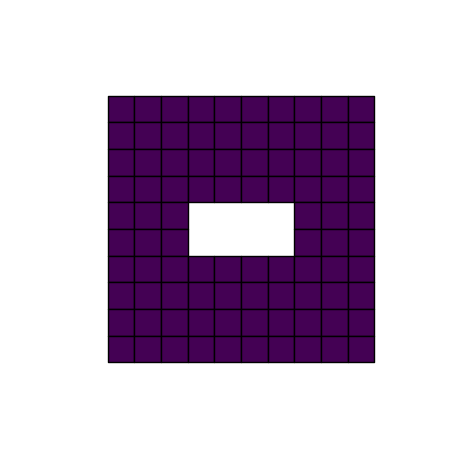

In [11]:
fi = Mesh.faces_points_to_index(v, f)
mesh = Mesh(v,fi,2)
mesh.visualize(max_x = 10, max_y = 10, show_axis=False)

In [12]:
exterior = []

for i in range(0,11):
  exterior.append([0,i])
  exterior.append([10,i])
for i in range(1,10):
  exterior.append([i,0])
  exterior.append([i,10])

for i in range(3,8):
  exterior.append([i,4])
  exterior.append([i,6])

exterior.append([3,5])
exterior.append([7,5])

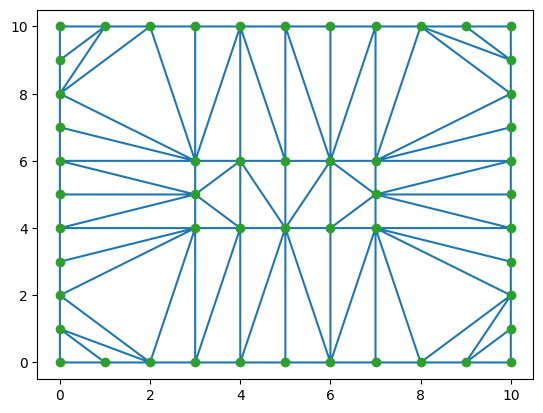

In [13]:
DT_Mesh_Deform.visualize_delaunay(exterior)

In [14]:
exterior_mapping = {}

for p in exterior:
  x = p[0]
  y = p[1]

  if (x >= 3 and x <= 7 and y >= 3 and y <= 7):
    exterior_mapping[(x,y)] = (x+2,y+2)
  else:
    exterior_mapping[(x,y)] = (x,y)


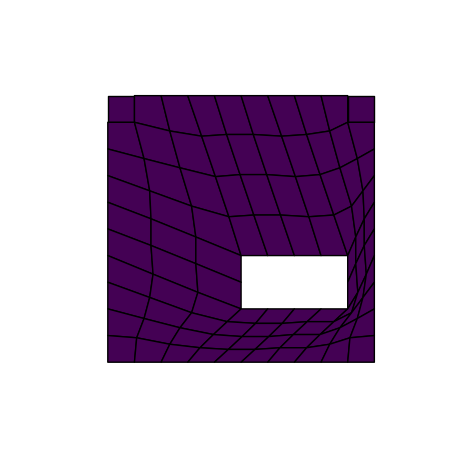

In [16]:
new_mesh = DTRBF1_Mesh_Deform.deform(mesh, exterior, exterior_mapping)
new_mesh.visualize(max_x = 10, max_y = 10, show_axis=False)